# Leverage cloud computing to enhance team work and accelerate mission science - A PODAAC perspective

### Jinbo Wang (Jinbo.Wang@jpl.nasa.gov), David Moroni, Tony Lee, Jack McNeils, Suresh Vannan, Mike Gangle, Ed Armstrong, John Klose, Catalina Oaida

### Jet Propulsion Laboratory, California Institute of Technology

March 30, 2022, ASAP-SWG workshop

# A brief introduction to PODAAC

1. DAAC: Distributed Active Archive Center
1. PODAAC is one of the 13 NASA DAACs
1. Disciplines: Ocean, Cyrosphere, Terrestrial dydrosphere, Air-Sea
1. Support missions: Seasat, TOPEX/Poseidon, Jason-1, NSCAT, SeaWinds on ADEOS-II, CYGNSS, GRACE/GRACE-FO, QuikSCAT, GHRSST, MEaSUREs, Aquarius, SPURS 1/2, ISS-RapidScat, OMG, /Sentinel-6 MF, ECCO, **COWVR/TEMPEST (2022)**, S-MODE EVS (2022), SWOT field campaigns (2019-2023), SWOT (2022)

## Moving data into Cloud

1. PO.DAAC will support new missions with big data
    * With new missions like Sentinel-6 Michael Freilich and Surface Water and Ocean Topography (SWOT) PO.DAAC needs to manage large data volumes (petabyte scale)
1. PO.DAAC will provide the same level of service and access to users 
     * Data search and download will be continue to be __free__ to all users
     * data-subscriber and data-downloader for conventional workflow. 
     * ```pip install podaac-data-subscriber```
     * https://github.com/podaac/data-subscriber
1. Direct in-cloud access 
     * Minimize the amount of data downloaded
     * Making the data more analysis ready 
     * Enable streamlined team collobration
     * Use jupyterlab (the platform for this demo)
1. By __June 2022, all PODAAC data will be in cloud__
    * Access to data via PO.DAAC Drive will shutdown in phases ⇒ Retirement complete by June 6, 2022


# A 4-minute demo of in-cloud access and analysis of PODAAC data

## Existing collections in PODAAC CLOUD (AWS S3)

In [1]:
import utils
import pprint
import xarray as xr
from datetime import datetime

In [2]:
s3=utils.direct_s3()
podaac_s3='podaac-ops-cumulus-protected'
collections=s3.glob("podaac-ops-cumulus-protected/*")
print(len(collections), "total collections in PODAAC CLOUD (POCLOUD) by %s."%datetime.today().strftime('%m/%d/%Y'))

395 total collections in PODAAC CLOUD (POCLOUD) by 03/21/2022.


## Find existing relevant datasets

We first show all datasets that are related to the keyword "Wind Vector" using ```utils.find_dataset(keywords=['Wind Vector'])```. 

In [3]:
wind_data=utils.find_dataset(keywords=['Wind Vector'])

                                    ASCATB-L2-25km                          MetOp-B ASCAT Level 2 25.0km Ocean Surface Wind Vectors in Full Orbit Swath  C2075141559-POCLOUD
                                    ASCATC-L2-25km                          MetOp-C ASCAT Level 2 25.0km Ocean Surface Wind Vectors in Full Orbit Swath  C2075141638-POCLOUD
                                 ASCATB-L2-Coastal                         MetOp-B ASCAT Level 2 Ocean Surface Wind Vectors Optimized for Coastal Ocean  C2075141605-POCLOUD
                                 ASCATC-L2-Coastal                         MetOp-C ASCAT Level 2 Ocean Surface Wind Vectors Optimized for Coastal Ocean  C2075141684-POCLOUD
                                    ASCATA-L2-25km                                             MetOp-A ASCAT Level 2 25.0 km Ocean Surface Wind Vectors  C2075141524-POCLOUD
                                 ASCATA-L2-Coastal                         MetOp-A ASCAT Level 2 Ocean Surface Wind Vectors Optimized f

The first column in the text shows the __short_name__, which is also the _folder_ name in the cloud storage (__a bucket__ in the AWS jargon). 

<div class="alert alert-block alert-warning">
Caveat: this utils.py module is not official PODAAC tool and subject to change in the future. 
</div>

## Dive into one example ASCATA L2

We see 11 Wind Vector datasets in POCLOUD. Let's take a look at one example. I am using [ASCATA_L2_COASTAL_CDR](https://podaac.jpl.nasa.gov/dataset/ASCATA_L2_COASTAL_CDR). 

The full path within AWS S3 from this example is 
```podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_010300_metopa_01042_eps_o_coa_ovw.l2.nc```

* __podaac-ops-cumulus-protected__ is the _root_ folder for all PODAAC data within AWS S3. It is often referred to as 'bucket'. 
* __ASCATA_L2_COASTAL_CDR__ is an unique __short_name__ for this particular dataset.
* __ascat_20070101_010300_metopa_01042_eps_o_coa_ovw.l2.nc__ is an L2 file, often refered to as __granule__. 


In [9]:
short_name="ASCATC-L2-25km"
fns=sorted(s3.glob(podaac_s3+'/%s/*nc'%short_name))
print('There are %i files in this dataset.'%len(fns))
print('The first five files are:')
pprint.pprint(fns[:5])
print('The last five files are:')
pprint.pprint(fns[-5:])

There are 12485 files in this dataset.
The first five files are:
['podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20191022_095700_metopc_04964_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20191022_153000_metopc_04967_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20191022_164200_metopc_04968_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20191022_182400_metopc_04969_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20191022_200600_metopc_04970_eps_o_250_3203_ovw.l2.nc']
The last five files are:
['podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20220320_162100_metopc_17470_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20220320_180300_metopc_17471_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/ascat_20220320_194500_metopc_17472_eps_o_250_3203_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATC-L2-25km/

## Open and plot
Let's open one example and plot it. 

In [41]:
#data=xr.open_dataset(s3.open(fns[0]))
data=xr.open_mfdataset([s3.open(fn) for fn in fns[:2]],combine='nested', concat_dim="NUMROWS", decode_times=False)
data

<xarray.Dataset>
Dimensions:           (NUMROWS: 2784, NUMCELLS: 42)
Coordinates:
    lat               (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    lon               (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
Dimensions without coordinates: NUMROWS, NUMCELLS
Data variables:
    time              (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    wvc_index         (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    model_speed       (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    model_dir         (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    ice_prob          (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    ice_age           (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    wvc_quality_flag  (NUMROWS, NUMCELLS) float64 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    wind_speed        (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    wind_dir          (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    bs_distance       (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
Attributes: (12/29)
    title:                            MetOp-C ASCAT Level 2 25.0 km Ocean Sur...
    title_short_name:                 ASCATC-L2-25km
    Conventions:                      CF-1.6
    institution:                      EUMETSAT/OSI SAF/KNMI
    source:                           MetOp-C ASCAT
    software_identification_level_1:  1000
    ...                               ...
    orbit_inclination:                98.7
    history:                          N/A
    references:                       ASCAT Wind Product User Manual, http://...
    comment:                          Orbit period and inclination are consta...
    creation_date:                    2019-10-22
    creation_time:                    12:39:42

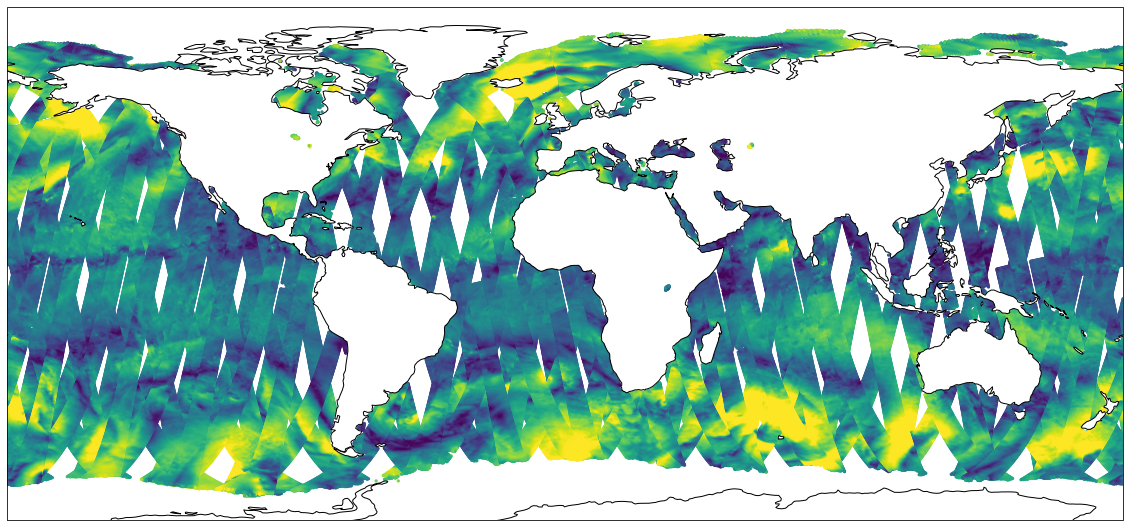

In [40]:
from matplotlib import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc4

#open multiple files
fig,ax=plt.subplots(1,1,figsize=(20,10),subplot_kw=dict(projection=ccrs.PlateCarree()) )
data=xr.open_mfdataset([s3.open(fn) for fn in fns[:20]],combine='nested', concat_dim="NUMROWS", decode_times=False)
ax.scatter(data['lon'],data['lat'],s=5,c=data['wind_speed'],vmin=0,vmax=15)
#ax.colorbar()
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')
ax.add_feature(cfeature.COASTLINE)
